In [1]:
!python --version

Python 3.7.12


In [2]:
pip install tensorflow==2.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.8/421.8 MB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.0/449.0 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 64.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.1/26.1 MB 45.1 MB/s eta 0:00:0000:0100:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=2d27d4149ad80397ed99b1db08c3cb7283e6aa477f9ecaf9eb0ccaeb5be64e3d
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: scipy
    Found existin

In [3]:
pip install tensorflow-quantum==0.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 28.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 71.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.4/120.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.5/115.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.5/115.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.2/115.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.6/93.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB

In [4]:
import os
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_quantum as tfq
from tensorflow import keras
import cirq
import sympy
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models

import os
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import collections
from cirq.contrib.svg import SVGCircuit

from sklearn.model_selection import train_test_split

import collections

Preprocessing

In [5]:
BATCH_SIZE = 32
TARGET_SIZE = (12, 12)

In [6]:
import os
import cv2
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Menyiapkan list kosong untuk menyimpan data dan label
data = []
labels = []
# Mendefinisikan kategori dan path direktori
categories = ['positif_tumor', 'negatif_tumor']
base_path = '/kaggle/input/brain-mri-ta-ugi-revised/brain_tumor_biner'

# Looping melalui kategori
for category in categories:
    path = os.path.join(base_path, category)
    class_num = categories.index(category)  # Mengonversi label ke angka jika diperlukan

    # Looping melalui file gambar
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image_array = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Membaca gambar dengan OpenCV
        image_array = cv2.resize(image_array, TARGET_SIZE)  # Mengubah ukuran gambar jika diperlukan
        data.append(image_array)
        labels.append(class_num)

# Mengubah data menjadi array NumPy
data = np.array(data)
labels = np.array(labels)

# Reshape array data agar menjadi 2D (flatten)
X_flat = data.reshape(data.shape[0], -1)

# Split dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_flat, labels, test_size=0.2, random_state=42)

# Menampilkan jumlah sampel dalam masing-masing kelas sebelum oversampling
print("Jumlah sampel kelas positif_tumor sebelum oversampling:", len(y_train[y_train == 0]))
print("Jumlah sampel kelas negatif_tumor sebelum oversampling:", len(y_train[y_train == 1]))

# Menerapkan RandomOverSampler untuk oversampling pada kelas minoritas
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Menampilkan jumlah sampel dalam masing-masing kelas setelah oversampling
print("\nJumlah sampel kelas positif_tumor setelah oversampling:", len(y_resampled[y_resampled == 0]))
print("Jumlah sampel kelas negatif_tumor setelah oversampling:", len(y_resampled[y_resampled == 1]))

# Kembalikan dimensi X_train ke bentuk (n_samples, height, width, channels)
X_resampled = X_resampled.reshape(X_resampled.shape[0], 12, 12, 3)
X_train = X_train.reshape(X_train.shape[0], 12, 12, 3)
X_test = X_test.reshape(X_test.shape[0], 12, 12, 3)

# Menampilkan dimensi X_train setelah reshape kembali
print("\nDimensi X_train setelah reshape kembali:", X_resampled.shape)

# Lanjutkan dengan proses training model Anda...

Jumlah sampel kelas positif_tumor sebelum oversampling: 2214
Jumlah sampel kelas negatif_tumor sebelum oversampling: 397

Jumlah sampel kelas positif_tumor setelah oversampling: 2214
Jumlah sampel kelas negatif_tumor setelah oversampling: 2214

Dimensi X_train setelah reshape kembali: (4428, 12, 12, 3)


In [7]:
print("Dimensi X_train:", X_resampled.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_resampled.shape)
print("Dimensi y_test:", y_test.shape)

Dimensi X_train: (4428, 12, 12, 3)
Dimensi X_test: (653, 12, 12, 3)
Dimensi y_train: (4428,)
Dimensi y_test: (653,)


In [8]:
print("Distribusi kelas pada data train sebelum oversampling:")
print(np.bincount(y_train))

# Distribusi kelas pada data train
print("\nDistribusi kelas pada data train:")
print(np.bincount(y_resampled))

# Distribusi kelas pada data test
print("\nDistribusi kelas pada data test:")
print(np.bincount(y_test))
# ['glioma','meningioma', 'no_tumor', 'pituitary']

Distribusi kelas pada data train sebelum oversampling:
[2214  397]

Distribusi kelas pada data train:
[2214 2214]

Distribusi kelas pada data test:
[550 103]


In [9]:
X_resampled = np.mean(X_resampled, axis=-1, keepdims=True)
X_train = np.mean(X_train, axis=-1, keepdims=True)
X_test = np.mean(X_test, axis=-1, keepdims=True)

In [10]:
print("Dimensi X_train:", X_resampled.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_resampled.shape)
print("Dimensi y_test:", y_test.shape)

Dimensi X_train: (4428, 12, 12, 1)
Dimensi X_test: (653, 12, 12, 1)
Dimensi y_train: (4428,)
Dimensi y_test: (653,)


Mulai

In [11]:
import tensorflow as tf
import numpy as np
import sympy
import cirq
import tensorflow_quantum as tfq
from tensorflow import keras

class QConv(tf.keras.layers.Layer):
    def __init__(self, filter_size, depth, activation=None, name=None, kernel_regularizer=None, **kwargs):
        super(QConv, self).__init__(name=name, **kwargs)
        self.filter_size = filter_size
        self.depth = depth
        self.learning_params = []
        self.QCNN_layer_gen()
        self.activation = tf.keras.layers.Activation(activation)
        self.kernel_regularizer = kernel_regularizer

    def _get_new_param(self):
        new_param = sympy.symbols('p'+str(len(self.learning_params)))
        self.learning_params.append(new_param)
        return new_param

    def _QConv(self, step, target, qubits):
        yield cirq.CZPowGate(exponent=self._get_new_param())(qubits[target], qubits[target+step])
        yield cirq.CXPowGate(exponent=self._get_new_param())(qubits[target], qubits[target+step])

    def QCNN_layer_gen(self):
        pixels = self.filter_size**2
        cirq_qubits = cirq.GridQubit.rect(self.filter_size, self.filter_size)
        input_circuit = cirq.Circuit()
        input_params = [sympy.symbols('a%d' %i) for i in range(pixels)]
        for i, qubit in enumerate(cirq_qubits):
            input_circuit.append(cirq.rx(np.pi*input_params[i])(qubit))

        QCNN_circuit = cirq.Circuit()
        step_size = [2**i for i in range(np.log2(pixels).astype(np.int32))]
        for step in step_size:
            for target in range(0, pixels, 2*step):
                QCNN_circuit.append(self._QConv(step, target, cirq_qubits))

        full_circuit = cirq.Circuit()
        full_circuit.append(input_circuit)
        full_circuit.append(QCNN_circuit)
        self.circuit = full_circuit
        self.params = input_params + self.learning_params
        self.op = cirq.Z(cirq_qubits[0])

    def build(self, input_shape):
        self.width = input_shape[1]
        self.height = input_shape[2]
        self.channel = input_shape[3]
        self.num_x = self.width - self.filter_size + 1
        self.num_y = self.height - self.filter_size + 1
        self.kernel = self.add_weight(name='kernal',
                                      shape=[self.depth, self.channel, len(self.learning_params)],
                                      initializer=tf.keras.initializers.glorot_normal(),
                                      regularizer=self.kernel_regularizer)
        self.circuit_tensor = tfq.convert_to_tensor([self.circuit] * self.num_x * self.num_y * self.channel)

    def call(self, inputs):
        stack_set = None
        for i in range(self.num_x):
            for j in range(self.num_y):
                slice_part = tf.slice(inputs, [0, i, j, 0], [-1, self.filter_size, self.filter_size, -1])
                slice_part = tf.reshape(slice_part, shape=[-1, 1, self.filter_size, self.filter_size, self.channel])
                if stack_set is None:
                    stack_set = slice_part
                else:
                    stack_set = tf.concat([stack_set, slice_part], 1)
        stack_set = tf.transpose(stack_set, perm=[0, 1, 4, 2, 3])
        stack_set = tf.reshape(stack_set, shape=[-1, self.filter_size**2])
        circuit_inputs = tf.tile([self.circuit_tensor], [tf.shape(inputs)[0], 1])
        circuit_inputs = tf.reshape(circuit_inputs, shape=[-1])
        tf.fill([tf.shape(inputs)[0]*self.num_x*self.num_y, 1], 1)
        outputs = []
        for i in range(self.depth):
            controller = tf.tile(self.kernel[i], [tf.shape(inputs)[0]*self.num_x*self.num_y, 1])
            outputs.append(self.single_depth_QCNN(stack_set, controller, circuit_inputs))
        output_tensor = tf.stack(outputs, axis=3)
        output_tensor = tf.math.acos(tf.clip_by_value(output_tensor, -1+1e-5, 1-1e-5)) / np.pi
        return self.activation(output_tensor)

    def single_depth_QCNN(self, input_data, controller, circuit_inputs):
        with tf.device('/device:GPU:0'):
            input_data = tf.concat([input_data, controller], 1)
            QCNN_output = tfq.layers.Expectation()(circuit_inputs,
                                                    symbol_names=self.params,
                                                    symbol_values=input_data,
                                                    operators=self.op)
            QCNN_output = tf.reshape(QCNN_output, shape=[-1, self.num_x, self.num_y, self.channel])
            return tf.math.reduce_sum(QCNN_output, 3)

    def __str__(self):
        return self.circuit.to_text_diagram()

    def show_circuit(self):
        print(self.circuit)

    def get_config(self):
        config = super().get_config()
        config.update({
            'filter_size': self.filter_size,
            'depth': self.depth,
            'activation': keras.activations.serialize(self.activation),
            'kernel_regularizer': keras.regularizers.serialize(self.kernel_regularizer),
        })
        return config


In [12]:
#Defining the varaibles to intitalize the QCNN
width = np.shape(X_resampled)[1]
height = np.shape(X_resampled)[2]

# QCNN With Oversampling

In [13]:
#Initializing the model
qcnn_model = models.Sequential()
#The QCNN!!!!!
qcnn_model.add(QConv(filter_size=2, depth=4, activation='relu', 
                     name='qconv1', input_shape=(width, height, 1)))
#So we can pase it to linear layers
qcnn_model.add(layers.Flatten())
qcnn_model.add(layers.Dense(32, activation='relu'))
#Important to have a softmax here... So all the probabilities add up to 100%
qcnn_model.add(layers.Dense(1, activation='sigmoid'))

qcnn_model.summary()

2024-04-03 14:37:24.360302: E tensorflow/stream_executor/cuda/cuda_driver.cc:351] failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
qconv1 (QConv)               (None, 11, 11, 4)         24        
_________________________________________________________________
flatten (Flatten)            (None, 484)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                15520     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 15,577
Trainable params: 15,577
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Getting ready to train (optimizer, loss, metrics)
qcnn_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
#Train it!!! (Taking out validation accuracy during training because takes too long) 4x4
qcnn_history = qcnn_model.fit(X_resampled, y_resampled,
                         validation_data=(X_test, y_test),
                         epochs=10)

Train on 4428 samples, validate on 653 samples
Epoch 1/10
4428/4428 [==============================] - 1287s 291ms/sample - loss: 0.6042 - accuracy: 0.6660 - val_loss: 0.5727 - val_accuracy: 0.7014
Epoch 2/10
4428/4428 [==============================] - 1262s 285ms/sample - loss: 0.4617 - accuracy: 0.8010 - val_loss: 0.5140 - val_accuracy: 0.7580
Epoch 3/10
4428/4428 [==============================] - 1260s 285ms/sample - loss: 0.3610 - accuracy: 0.8652 - val_loss: 0.4653 - val_accuracy: 0.7963
Epoch 4/10
4428/4428 [==============================] - 1257s 284ms/sample - loss: 0.2821 - accuracy: 0.9106 - val_loss: 0.3561 - val_accuracy: 0.8515
Epoch 5/10
4428/4428 [==============================] - 1247s 282ms/sample - loss: 0.2172 - accuracy: 0.9406 - val_loss: 0.3411 - val_accuracy: 0.8637
Epoch 6/10
4428/4428 [==============================] - 1278s 289ms/sample - loss: 0.1666 - accuracy: 0.9627 - val_loss: 0.3367 - val_accuracy: 0.8591
Epoch 7/10
4428/4428 [=========================

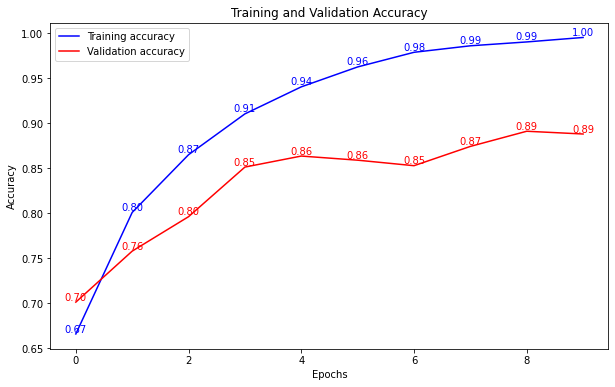

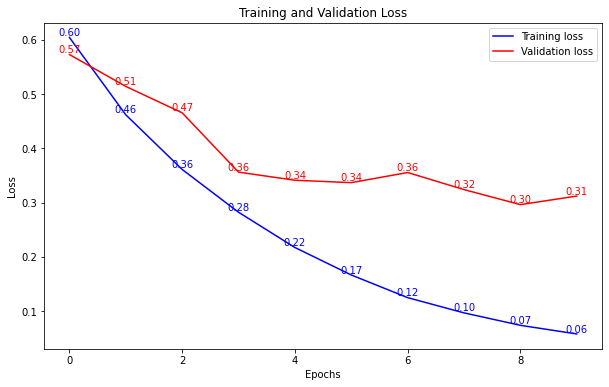

In [16]:
accuracy = qcnn_history.history['accuracy']
val_accuracy = qcnn_history.history['val_accuracy']

loss = qcnn_history.history['loss']
val_loss = qcnn_history.history['val_loss']

epochs = range(len(accuracy))

# Perbesar ukuran gambar
plt.figure(figsize=(10, 6))

# Plot grafik training dan validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

# Menambahkan nilai di setiap titik
for i, acc in enumerate(accuracy):
    plt.text(i, acc, f'{acc:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
for i, val_acc in enumerate(val_accuracy):
    plt.text(i, val_acc, f'{val_acc:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Perbesar ukuran gambar
plt.figure(figsize=(10, 6))

# Plot grafik training dan validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

# Menambahkan nilai di setiap titik
for i, ls in enumerate(loss):
    plt.text(i, ls, f'{ls:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
for i, val_ls in enumerate(val_loss):
    plt.text(i, val_ls, f'{val_ls:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [17]:
from sklearn.metrics import accuracy_score, classification_report

# Misalkan X_test dan y_test adalah data uji dan labelnya
# Prediksi menggunakan model cnn_model
predictions = qcnn_model.predict(X_test)

# Mengonversi prediksi menjadi kelas (0 atau 1) berdasarkan threshold 0.5
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Menghitung akurasi
accuracy = accuracy_score(y_test, predicted_classes)
print("Akurasi:", accuracy)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))

Akurasi: 0.888208269525268

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       550
           1       0.64      0.68      0.66       103

    accuracy                           0.89       653
   macro avg       0.79      0.80      0.80       653
weighted avg       0.89      0.89      0.89       653



In [18]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[510  40]
 [ 33  70]]


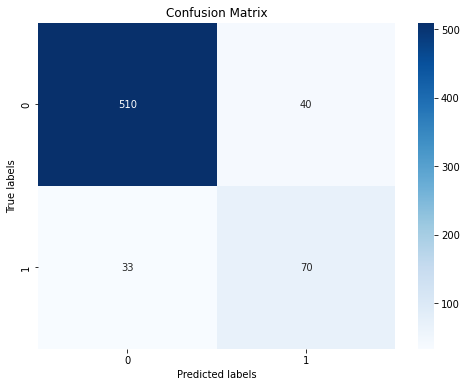

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Membuat heatmap untuk visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from IPython.display import FileLink

qcnn_model.save('brain_tumor_qcnn_1layer_biner.h5')

FileLink('brain_tumor_qcnn_1layer_biner.h5')

/kaggle/working/brain_tumor_qcnn_1layer_biner.h5

# QCNN Tanpa Oversampling

In [21]:
#Initializing the model
qcnn_model2 = models.Sequential()
#The QCNN!!!!!
qcnn_model2.add(QConv(filter_size=2, depth=4, activation='relu', 
                     name='qconv1', input_shape=(width, height, 1)))
#So we can pase it to linear layers
qcnn_model2.add(layers.Flatten())
qcnn_model2.add(layers.Dense(32, activation='relu'))
#Important to have a softmax here... So all the probabilities add up to 100%
qcnn_model2.add(layers.Dense(1, activation='sigmoid'))

qcnn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
qconv1 (QConv)               (None, 11, 11, 4)         24        
_________________________________________________________________
flatten_1 (Flatten)          (None, 484)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                15520     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 15,577
Trainable params: 15,577
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Getting ready to train (optimizer, loss, metrics)
qcnn_model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train = np.mean(X_train, axis=-1, keepdims=True)
X_test = np.mean(X_test, axis=-1, keepdims=True)

In [24]:
#Train it!!! (Taking out validation accuracy during training because takes too long) 4x4
qcnn_history2 = qcnn_model2.fit(X_train, y_train,
                         validation_data=(X_test, y_test),epochs=10)

Train on 2611 samples, validate on 653 samples
Epoch 1/10
2611/2611 [==============================] - 774s 296ms/sample - loss: 0.4487 - accuracy: 0.8384 - val_loss: 0.4198 - val_accuracy: 0.8453
Epoch 2/10
2611/2611 [==============================] - 755s 289ms/sample - loss: 0.3810 - accuracy: 0.8506 - val_loss: 0.3740 - val_accuracy: 0.8499
Epoch 3/10
2611/2611 [==============================] - 761s 291ms/sample - loss: 0.3545 - accuracy: 0.8583 - val_loss: 0.3572 - val_accuracy: 0.8591
Epoch 4/10
2611/2611 [==============================] - 762s 292ms/sample - loss: 0.3308 - accuracy: 0.8682 - val_loss: 0.3449 - val_accuracy: 0.8560
Epoch 5/10
2611/2611 [==============================] - 754s 289ms/sample - loss: 0.3066 - accuracy: 0.8759 - val_loss: 0.3361 - val_accuracy: 0.8821
Epoch 6/10
2611/2611 [==============================] - 762s 292ms/sample - loss: 0.2864 - accuracy: 0.8928 - val_loss: 0.3311 - val_accuracy: 0.8760
Epoch 7/10
2611/2611 [==============================]

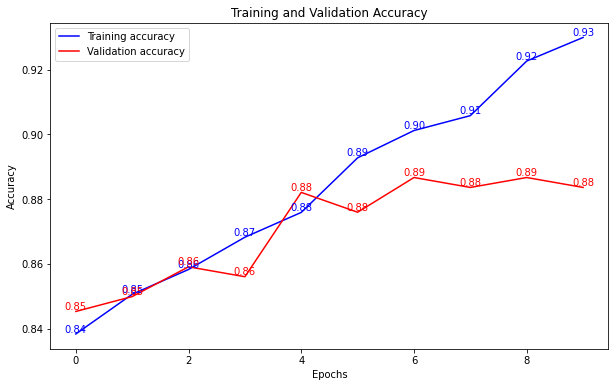

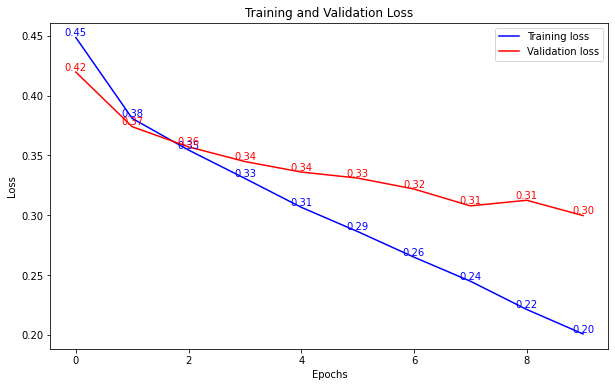

In [25]:
accuracy = qcnn_history2.history['accuracy']
val_accuracy = qcnn_history2.history['val_accuracy']

loss = qcnn_history2.history['loss']
val_loss = qcnn_history2.history['val_loss']

epochs = range(len(accuracy))

# Perbesar ukuran gambar
plt.figure(figsize=(10, 6))

# Plot grafik training dan validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

# Menambahkan nilai di setiap titik
for i, acc in enumerate(accuracy):
    plt.text(i, acc, f'{acc:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
for i, val_acc in enumerate(val_accuracy):
    plt.text(i, val_acc, f'{val_acc:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Perbesar ukuran gambar
plt.figure(figsize=(10, 6))

# Plot grafik training dan validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

# Menambahkan nilai di setiap titik
for i, ls in enumerate(loss):
    plt.text(i, ls, f'{ls:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
for i, val_ls in enumerate(val_loss):
    plt.text(i, val_ls, f'{val_ls:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Misalkan X_test dan y_test adalah data uji dan labelnya
# Prediksi menggunakan model cnn_model
predictions = qcnn_model2.predict(X_test)

# Mengonversi prediksi menjadi kelas (0 atau 1) berdasarkan threshold 0.5
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Menghitung akurasi
accuracy = accuracy_score(y_test, predicted_classes)
print("Akurasi:", accuracy)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))

Akurasi: 0.8836140888208269

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       550
           1       0.78      0.37      0.50       103

    accuracy                           0.88       653
   macro avg       0.83      0.67      0.72       653
weighted avg       0.87      0.88      0.87       653



In [27]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[539  11]
 [ 65  38]]


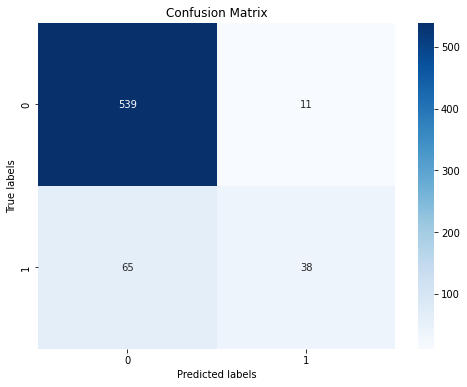

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Membuat heatmap untuk visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from IPython.display import FileLink

qcnn_model2.save('brain_tumor_qcnn_1layer_biner.h5')

FileLink('brain_tumor_qcnn_1layer_biner.h5')

/kaggle/working/brain_tumor_qcnn_1layer_biner.h5

# QCNN With Augmentation

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Menyiapkan list kosong untuk menyimpan data dan label
data = []
labels = []
# Mendefinisikan kategori dan path direktori
categories = ['positif_tumor', 'negatif_tumor']
base_path = '/kaggle/input/brain-mri-ta-ugi-revised/brain_tumor_biner/brain_tumor_biner'

# Looping melalui kategori
for category in categories:
    path = os.path.join(base_path, category)
    class_num = categories.index(category)  # Mengonversi label ke angka jika diperlukan

    # Looping melalui file gambar
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image_array = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Membaca gambar dengan OpenCV
        image_array = cv2.resize(image_array, TARGET_SIZE)  # Mengubah ukuran gambar jika diperlukan
        data.append(image_array)
        labels.append(class_num)

# Mengubah data menjadi array NumPy
data = np.array(data)
labels = np.array(labels)

In [ ]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Menampilkan dimensi data
print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test:", y_test.shape)

In [ ]:
# Distribusi kelas pada data train
print("Distribusi kelas pada data train:")
print(np.bincount(y_train))

# Distribusi kelas pada data test
print("\nDistribusi kelas pada data test:")
print(np.bincount(y_test))
# ['glioma','meningioma', 'no_tumor', 'pituitary']

In [ ]:
import numpy as np
from imgaug import augmenters as iaa

# Fungsi untuk melakukan augmentasi pada kelas minoritas
def augment_minority_class(X_train, y_train, minority_class_label, augmentation_factor=2):
    # Mendapatkan indeks dari kelas minoritas
    minority_indices = np.where(y_train == minority_class_label)[0]
    
    # Menyiapkan array untuk menyimpan data hasil augmentasi
    augmented_X = []
    augmented_y = []
    
    # Augmentasi menggunakan imgaug
    seq = iaa.Sequential([
        iaa.Fliplr(0.5),  # Flip horizontal 50% of the time
        iaa.GaussianBlur(sigma=(0.0, 1.0)),  # Gaussian blur with random sigma
        iaa.Affine(rotate=(-20, 20))  # Random rotation between -20 to 20 degrees
    ])
    
    # Menghitung berapa kali augmentasi harus dilakukan
    target_count = 2073  # Jumlah data pada kelas pertama
    current_count = len(minority_indices)
    augmentation_needed = target_count - current_count
    
    # Menambahkan variasi augmentasi untuk mendekati jumlah data kelas pertama
    augmentation_factor = max(1, augmentation_needed // current_count)  # Jumlah augmentasi yang diperlukan per sampel
    
    for index in minority_indices:
        image = X_train[index]
        label = y_train[index]
        
        # Augmentasi gambar sebanyak augmentation_factor kali
        augmented_images = [seq.augment_image(image) for _ in range(augmentation_factor)]
        augmented_labels = [label] * len(augmented_images)
        
        # Menyimpan hasil augmentasi
        augmented_X.extend(augmented_images)
        augmented_y.extend(augmented_labels)
    
    # Menggabungkan data augmented dengan data awal
    augmented_X = np.array(augmented_X)
    augmented_y = np.array(augmented_y)
    balanced_X_train = np.concatenate([X_train, augmented_X], axis=0)
    balanced_y_train = np.concatenate([y_train, augmented_y], axis=0)
    
    return balanced_X_train, balanced_y_train

# Contoh penggunaan
# Misalnya kelas minoritas memiliki label 1
X_train_balanced, y_train_balanced = augment_minority_class(X_train, y_train, minority_class_label=1)

In [ ]:
# Distribusi kelas pada data train
print("Distribusi kelas pada data train balanced:")
print(np.bincount(y_train_balanced))

# Distribusi kelas pada data test
print("\nDistribusi kelas pada data test:")
print(np.bincount(y_test))
# ['glioma','meningioma', 'no_tumor', 'pituitary']

In [ ]:
X_train_balanced = np.mean(X_train_balanced, axis=-1, keepdims=True)
X_test = np.mean(X_test, axis=-1, keepdims=True)

In [ ]:
#Defining the varaibles to intitalize the QCNN
width = np.shape(X_train_balanced)[1]
height = np.shape(X_train_balanced)[2]

In [ ]:
#Initializing the model
qcnn_model3 = models.Sequential()
#The QCNN!!!!!
qcnn_model3.add(QConv(filter_size=2, depth=4, activation='relu', 
                     name='qconv1', input_shape=(width, height, 1)))
#So we can pase it to linear layers
qcnn_model3.add(layers.Flatten())
qcnn_model3.add(layers.Dense(32, activation='relu'))
#Important to have a softmax here... So all the probabilities add up to 100%
qcnn_model3.add(layers.Dense(1, activation='sigmoid'))

qcnn_model3.summary()

In [ ]:
#Getting ready to train (optimizer, loss, metrics)
qcnn_model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Train it!!! (Taking out validation accuracy during training because takes too long) 4x4
qcnn_history3 = qcnn_model3.fit(X_train_balanced, y_train_balanced,
                         validation_data=(X_test, y_test),
                         epochs=10)

In [ ]:
accuracy = qcnn_history3.history['accuracy']
val_accuracy = qcnn_history3.history['val_accuracy']

loss = qcnn_history3.history['loss']
val_loss = qcnn_history3.history['val_loss']

epochs = range(len(accuracy))

# Perbesar ukuran gambar
plt.figure(figsize=(10, 6))

# Plot grafik training dan validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

# Menambahkan nilai di setiap titik
for i, acc in enumerate(accuracy):
    plt.text(i, acc, f'{acc:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
for i, val_acc in enumerate(val_accuracy):
    plt.text(i, val_acc, f'{val_acc:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Perbesar ukuran gambar
plt.figure(figsize=(10, 6))

# Plot grafik training dan validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

# Menambahkan nilai di setiap titik
for i, ls in enumerate(loss):
    plt.text(i, ls, f'{ls:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
for i, val_ls in enumerate(val_loss):
    plt.text(i, val_ls, f'{val_ls:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Misalkan X_test dan y_test adalah data uji dan labelnya
# Prediksi menggunakan model cnn_model
predictions = qcnn_model3.predict(X_test)

# Mengonversi prediksi menjadi kelas (0 atau 1) berdasarkan threshold 0.5
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Menghitung akurasi
accuracy = accuracy_score(y_test, predicted_classes)
print("Akurasi:", accuracy)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))

In [ ]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Membuat heatmap untuk visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from IPython.display import FileLink

qcnn_model3.save('brain_tumor_qcnn_1layer_biner_aug.h5')

FileLink('brain_tumor_qcnn_1layer_biner_aug.h5')